In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from astropy.io import fits

In [4]:
# data from TIC 55525572 : 1st validated planet from Planet Hunters TESS
# Data format - see:
#  https://exoplanetarchive.ipac.caltech.edu/docs/DVTimeSeries-Description.pdf
imfile = 'data/tess2019169103026-s0013-0000000055525572-0146-s_tp.fits'
hdulist = fits.open(imfile)

hdulist.info()

Filename: data/tess2019169103026-s0013-0000000055525572-0146-s_tp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  PIXELS        1 BinTableHDU    248   20479R x 11C   [D, E, J, 121J, 121E, 121E, 121E, 121E, J, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   
  3  TARGET COSMIC RAY    1 BinTableHDU     27   0R x 4C   [J, I, I, E]   


In [5]:
hdu0 = hdulist[0]
hdu1 = hdulist[1]
hdu2 = hdulist[2]
hdu3 = hdulist[3]



In [6]:
print(hdu1.columns)
hdu1.header


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAW_CNTS'; format = '121J'; unit = 'count'; null = -1; disp = 'I8'; dim = '(11,11)'
    name = 'FLUX'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'FLUX_BKG_ERR'; format = '121E'; unit = 'e-/s'; disp = 'E14.7'; dim = '(11,11)'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'POS_CORR1'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'POS_CORR2'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
)


XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2448 / length of first array dimension                
NAXIS2  =                20479 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   11 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [7]:
data1 = hdu1.data

# filter out incomplete data that would cause processing error
_tmp = data1[~np.isnan(data1['TIME'])]
print(f"{len(data1) - len(_tmp)} records filtered out - no TIME data")
data1 = _tmp


668 records filtered out - no TIME data


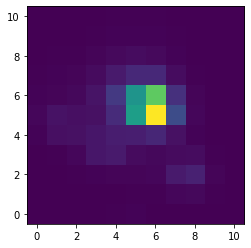

In [19]:
plt.imshow(data1[10000]['RAW_CNTS'], origin='lower')

In [24]:
print(hdu3.columns)
hdu3.header


ColDefs(
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'RAWX'; format = 'I'; unit = 'pixel'; disp = 'I4'
    name = 'RAWY'; format = 'I'; unit = 'pixel'; disp = 'I4'
    name = 'COSMIC_RAY'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
)


XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of first array dimension                
NAXIS2  =                    0 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'CADENCENO'          / column title: unique cadence number            
TFORM1  = 'J       '           / column format: signed 32-bit integer           
TDISP1  = 'I10     '           / column display format                          
TTYPE2  = 'RAWX    '           / column title: CCD column                       
TFORM2  = 'I       '        

In [25]:
data3 = hdu3.data
len(data3)

0

In [8]:
# close the file
hdulist.close()

113454